# Computational Social Choice - Assignment 3
Yorick Juffer - s1993623 \
Ioana Cojocaru - s5002117

## Libraries

In [1]:
import random
import copy
import csv
import pandas as pd
import matplotlib.pyplot as plt

## Candidate List

In [2]:
candidate = {
    1: "Jackie Kasabach",
    2: "Jack Johnson",
    3: "Adam Frisch",
    4: "Torre",
    5: "Michael Behrendt",
    6: "Jason Lasser",
    7: "Michael Wampler",
    8: "Derek Johnson",
    9: "Brian D. Speck",
    10: "Write In 1",
    11: "Write In 2"
}

## Functions

### Load Data
- Loads the data.txt file. 
- The output profile is a list, of which each element contains a vote (profile[n][0]) and preferences (profile[n][1:]).
- Each voters preferences are made unique so (profile[n][0]=1), so they can be easily manipulated. 
- If there is a tie ([1, 2]), both recieve a vote.

In [3]:
def load(path): 
    profile = []

    with open(path, 'r') as file:
        for line in file:
            line = line.strip()

            # for each line, split the votes and preferences
            if line:
                votes_str, preferences_str = line.split(':')
                votes = int(votes_str)

                for _ in range(votes):

                    preferences = []
                    tied_preferences = []
                    tie = False

                    # add the preferences to the profile
                    # split the tied votes and add them as a list to the profile
                    for pref in preferences_str.split(','):
                        pref = pref.strip()

                        if "}" in pref:
                            pref = pref.replace('}', '')
                            tied_preferences.append(int(pref))
                            preferences.append(tied_preferences)
                            tie = False

                        elif "{" in pref or tie:
                            pref = pref.replace('{', '')
                            tied_preferences.append(int(pref))
                            tie = True
                        else:
                            preferences.append(int(pref))

                    # add the votes and preferences to the profile
                    profile.append(preferences)

    return profile

# load data and convert
file_path = 'data.txt'
original_profile = load(file_path)
profile_length = len(original_profile)

### Single Transferable Vote
- This function takes a profile and a list of candidates and returns the winner of the election using the STV social choice function. 
- The profile ranges alternatives from 1 to 11, but this function uses a 0-based index to represent the candidates.

In [12]:
def single_transferable_vote(profile, candidates, print_status=False):
    eliminated_candidates = []

    round = 0
    while len(eliminated_candidates) < len(candidates):

        # reset the round
        round += 1
        tally = [0] * len(candidates)
        for index in eliminated_candidates:
            tally[index] = None
        lowest_votes = 0
        eliminate = []

        # tally the votes for each candidate
        for pref in profile:

            n = 0
            # search for the candidate with the highest preference that has not been eliminated
            searching = True
            while searching:

                # if the preference is a tie 
                if isinstance(pref[n], list):
                    m = 0

                    # for each tied preference, check if the candidate has been eliminated otherwise tally the votes
                    for _ in pref[n]:

                        if pref[n][m] - 1 not in eliminated_candidates:
                            candidate = pref[n][m] - 1
                            tally[candidate] += 1

                        m += 1
                        if m >= len(pref[n]):
                            searching = False

                # check if the candidate has been eliminated
                elif pref[n] - 1 not in eliminated_candidates:
                    candidate = pref[n] - 1
                    tally[candidate] += 1
                    searching = False

                n += 1
                if n >= len(pref):
                    searching = False

        # eliminate the candidate with the lowest votes
        lowest_votes = min(value for value in tally if value is not None)
        eliminate = [i for i, value in enumerate(tally) if value == lowest_votes]
        eliminated_candidates.extend(eliminate)

        # find the winner
        highest_votes = max(value for value in tally if value is not None)
        winner = [i for i, value in enumerate(tally) if value == highest_votes]

        if print_status:
            print("---ROUND {}---".format(round))
            print("Tally: {}".format(tally))
            print("Eliminated {}:".format(eliminate))
            print()

    return winner, highest_votes

### Manipulate Functions
- Take in a P and output P'

In [5]:
# Change target to the first position candidate of n voters.
def target_manipulate(profile, n, target):

    rng = random.sample(range(0, len(profile)), n)

    for index in rng:    
        pref = profile[index]
        if target in pref:
            pref.remove(target)
        pref.insert(0, target)
        profile[index] = pref

    return profile

# Randomly shuffle the preferences of n voters.
def random_manipulate(profile, n):
     
    rng = random.sample(range(0, len(profile)), n)

    for index in rng:
        pref = profile[index]
        random.shuffle(pref)
        profile[index] = pref

    return profile

## Results
- 1: "Jackie Kasabach",
- 2: "Jack Johnson",
- 3: "Adam Frisch",
- 4: "Torre",
- 5: "Michael Behrendt",
- 6: "Jason Lasser",
- 7: "Michael Wampler",
- 8: "Derek Johnson",
- 9: "Brian D. Speck",
- 10: "Write In 1",
- 11: "Write In 2"

In [15]:
profile_length = len(original_profile)

# FIND THE WINNER
profile1 = copy.deepcopy(original_profile)
original_results = single_transferable_vote(profile1, candidate, print_status=True)
for result in original_results[0]:
    print("{} wins with {} votes! \n".format(candidate[result + 1], original_results[1]))

# MANIPULATE THE VOTES BY RANDAOM PREFERENCE SHUFFLE
# printing results turned off 
profile2 = copy.deepcopy(original_profile)
manipulated_profile = random_manipulate(profile2, profile_length)
manipulated_results = single_transferable_vote(manipulated_profile, candidate)
for result in manipulated_results[0]:
    print("{} wins with {} votes! \n".format(candidate[result + 1], original_results[1]))

# MANIPULATE THE VOTES BY TARGETING A CANDIDATE
# printing results turned off 
profile3 = copy.deepcopy(original_profile)
manipulated_profile = target_manipulate(profile3, profile_length, 11)
manipulated_results = single_transferable_vote(manipulated_profile, candidate)
for result in manipulated_results[0]:
    print("{} wins with {} votes! \n".format(candidate[result + 1], original_results[1]))

---ROUND 1---
Tally: [247, 456, 415, 385, 352, 27, 94, 463, 38, 0, 0]
Eliminated [9, 10]:

---ROUND 2---
Tally: [247, 456, 415, 385, 352, 27, 94, 463, 38, None, None]
Eliminated [5]:

---ROUND 3---
Tally: [247, 460, 416, 394, 355, None, 96, 466, 41, None, None]
Eliminated [8]:

---ROUND 4---
Tally: [253, 464, 422, 396, 365, None, 100, 474, None, None, None]
Eliminated [6]:

---ROUND 5---
Tally: [259, 478, 433, 416, 383, None, None, 494, None, None, None]
Eliminated [0]:

---ROUND 6---
Tally: [None, 535, 467, 458, 445, None, None, 547, None, None, None]
Eliminated [4]:

---ROUND 7---
Tally: [None, 620, 557, 552, None, None, None, 671, None, None, None]
Eliminated [3]:

---ROUND 8---
Tally: [None, 801, 672, None, None, None, None, 815, None, None, None]
Eliminated [2]:

---ROUND 9---
Tally: [None, 908, None, None, None, None, None, 1227, None, None, None]
Eliminated [1]:

---ROUND 10---
Tally: [None, None, None, None, None, None, None, 1685, None, None, None]
Eliminated [7]:

Derek Johns

## Grid Search to Find P'

In [7]:
# run the impact of random manipulations across parameters
def random_grid_search(profile, original_results, n, iterations):
        
    results = []

    while n > 0:

        # iterate over manipulations to estimate true means
        for _ in range(iterations):
            x = copy.deepcopy(profile)
            manipulated_profile = random_manipulate(x, n)
            output = single_transferable_vote(manipulated_profile, candidate)
            results.append([original_results[0] == output[0], n, iterations])
            
        n -= 1
        print("SEARCHING: n = {}, ".format(n))
        
    return results

# run the impact of target manipulations across parameters
def target_grid_search(profile, original_results, n, iterations):

    n_max = n  
    results = []

    for target in range(len(candidate)): 
        while n > 0:

            # iterate over manipulations to estimate true means
            for _ in range(iterations):
                x = copy.deepcopy(profile)
                manipulated_profile = target_manipulate(x, n, target+1)
                output = single_transferable_vote(manipulated_profile, candidate)
                results.append([original_results[0] == output[0], n, iterations, target+1])

            n -= 1
            print("SEARCHING: n = {}, target = {}, ".format(n, target+1))
        
        n = n_max
            
    return results

## Analysis

### RANDOM SEARCH

In [8]:
n = 1000
iterations = 10

results = random_grid_search(original_profile, original_results, n, iterations)
csv_file_path = 'results_random.csv'

# # Write the results to the CSV file
with open(csv_file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['match', 'n', 'i'])
    writer.writerows(results)

print("Results saved to {}".format(csv_file_path))

Finding minimum for n = 999
Finding minimum for n = 998
Finding minimum for n = 997
Finding minimum for n = 996
Finding minimum for n = 995
Finding minimum for n = 994
Finding minimum for n = 993
Finding minimum for n = 992
Finding minimum for n = 991
Finding minimum for n = 990
Finding minimum for n = 989
Finding minimum for n = 988
Finding minimum for n = 987
Finding minimum for n = 986
Finding minimum for n = 985
Finding minimum for n = 984
Finding minimum for n = 983
Finding minimum for n = 982
Finding minimum for n = 981
Finding minimum for n = 980
Finding minimum for n = 979
Finding minimum for n = 978
Finding minimum for n = 977
Finding minimum for n = 976
Finding minimum for n = 975
Finding minimum for n = 974
Finding minimum for n = 973
Finding minimum for n = 972
Finding minimum for n = 971
Finding minimum for n = 970
Finding minimum for n = 969
Finding minimum for n = 968
Finding minimum for n = 967
Finding minimum for n = 966
Finding minimum for n = 965
Finding minimum for 

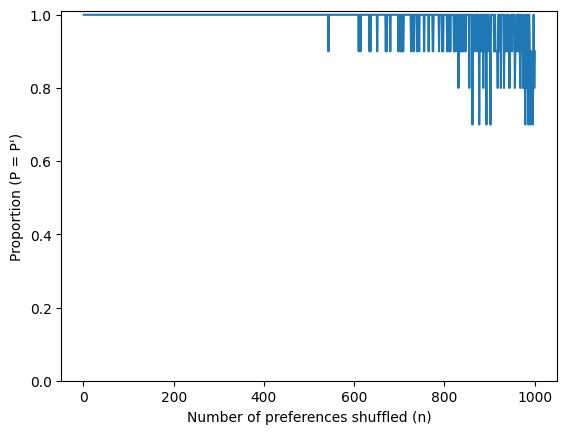

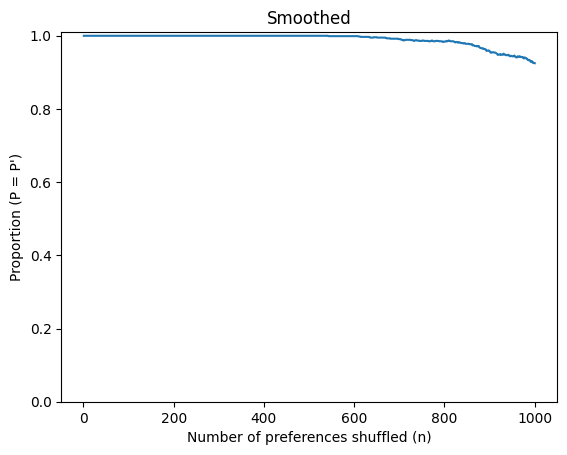

In [9]:
# DARW PLOTS
df = pd.read_csv('results_random.csv')

proportions = df.groupby('n')['match'].mean()
proportions.plot(kind='line')
plt.xlabel('Number of preferences shuffled (n)')
plt.ylabel("Proportion (P = P')")
plt.ylim(0, 1.01)
plt.show()

smoothed_proportions = proportions.rolling(window=100, min_periods=1).mean()
smoothed_proportions.plot(kind='line')
plt.xlabel('Number of preferences shuffled (n)')
plt.ylabel("Proportion (P = P')")
plt.ylim(0, 1.01)
plt.title('Smoothed')
plt.show()

### TARGET SEARCH
- Target is the candidate that n wants to win.

In [10]:
n = 1000
iterations = 10

results = target_grid_search(original_profile, original_results, n, iterations)
csv_file_path = 'results_target.csv'

# # Write the results to the CSV file
with open(csv_file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['match', 'n', 'i', 'target'])
    writer.writerows(results)

print("Results saved to {}".format(csv_file_path))

SEARCHING: n = 999, target = 1, 
SEARCHING: n = 998, target = 1, 
SEARCHING: n = 997, target = 1, 
SEARCHING: n = 996, target = 1, 
SEARCHING: n = 995, target = 1, 
SEARCHING: n = 994, target = 1, 
SEARCHING: n = 993, target = 1, 
SEARCHING: n = 992, target = 1, 
SEARCHING: n = 991, target = 1, 
SEARCHING: n = 990, target = 1, 
SEARCHING: n = 989, target = 1, 
SEARCHING: n = 988, target = 1, 
SEARCHING: n = 987, target = 1, 
SEARCHING: n = 986, target = 1, 
SEARCHING: n = 985, target = 1, 
SEARCHING: n = 984, target = 1, 
SEARCHING: n = 983, target = 1, 
SEARCHING: n = 982, target = 1, 
SEARCHING: n = 981, target = 1, 
SEARCHING: n = 980, target = 1, 
SEARCHING: n = 979, target = 1, 
SEARCHING: n = 978, target = 1, 
SEARCHING: n = 977, target = 1, 
SEARCHING: n = 976, target = 1, 
SEARCHING: n = 975, target = 1, 
SEARCHING: n = 974, target = 1, 
SEARCHING: n = 973, target = 1, 
SEARCHING: n = 972, target = 1, 
SEARCHING: n = 971, target = 1, 
SEARCHING: n = 970, target = 1, 
SEARCHING:

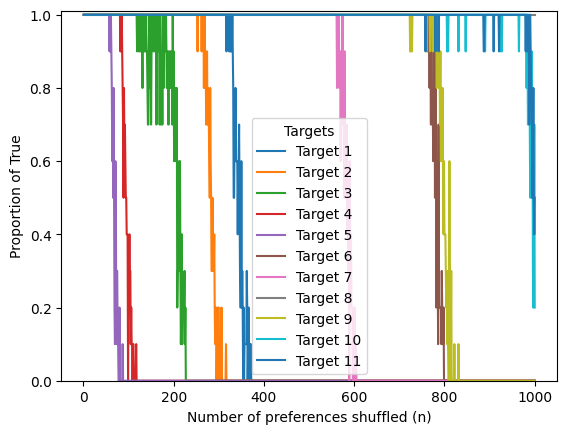

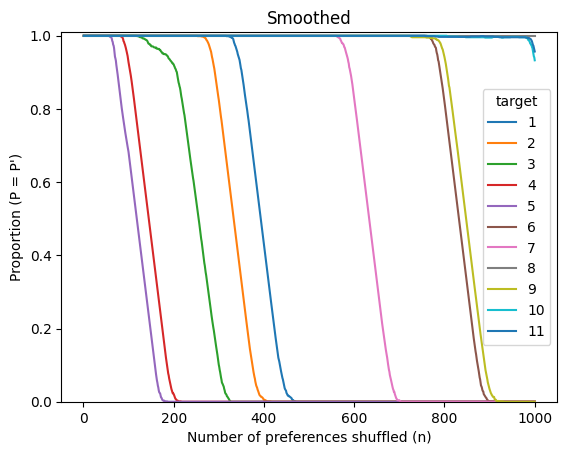

In [16]:
df = pd.read_csv('results_target.csv')

proportions = df.groupby(['n', 'target'])['match'].mean().unstack()

# Plot a line for each 'target'
for target in proportions.columns:
    plt.plot(proportions.index, proportions[target], label=f'Target {target}')

# Add labels and legend
plt.xlabel('Number of preferences shuffled (n)')
plt.ylabel("Proportion of True")
plt.ylim(0, 1.01)
plt.legend(title='Targets')

# Show the plot
plt.show()

smoothed_proportions = proportions.rolling(window=100, min_periods=1).mean()
smoothed_proportions.plot(kind='line')
plt.xlabel('Number of preferences shuffled (n)')
plt.ylabel("Proportion (P = P')")
plt.ylim(0, 1.01)
plt.title('Smoothed')
plt.show()